
<a id='lake-model'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Modelo de Lago de Emprego e Desemprego


<a id='index-0'></a>

## Conteúdo

- [Modelo de Lago de Emprego e Desemprego](#Modelo-de-Lago-de-Emprego-e-Desemprego)  
  - [Resumo](#Resumo)  
  - [O Modelo](#O-Modelo)  
  - [Implementação](#Implementação)  
  - [Dinâmica de um Trabalhador Individual](#Dinâmica-de-um-Trabalhador-Individual)  
  - [Taxa de Procura de Emprego Endógena](#Taxa-de-Procura-de-Emprego-Endógena)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Esta palestra descreve o que passou a ser chamado de *modelo de lago*.

O modelo do lago é uma ferramenta básica para modelar o desemprego.

Isso nos permite analisar

- Fluxos entre desemprego e emprego, e
- Como esses fluxos influenciam as taxas de emprego e desemprego no estado estacionário


É um bom modelo para interpretar relatórios mensais do departamento de trabalho sobre empregos brutos e líquidos criados e empregos destruídos.

Os "lagos" no modelo são os grupos de empregados e desempregados.

Os "fluxos" entre os lagos são causados por:

- Demissão e contratação
- Entrada e saída da força de trabalho


Para a primeira parte desta palestra, os parâmetros que governam as transições para o desemprego e o emprego são exógenos.

Posteriormente, determinaremos algumas dessas taxas de transição endogenamente usando o [modelo de pesquisa McCall](https://julia.quantecon.org/../dynamic_programming/mccall_model.html).

Também usaremos alguns conceitos bacanas, como ergodicidade, que fornecem um link fundamental entre distribuições *transversais* e *séries temporais de longo prazo*.

Esses conceitos nos ajudarão a construir um modelo de equilíbrio de trabalhadores ex ante homogêneos cuja sorte diferente gere variações em suas experiências ex post.

### Pré-requisitos

Antes de trabalhar no que segue, recomendamos que você leia a [aula sobre
cadeias finitas de Markov](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html).

Você também precisará de algumas ferramentas de [álgebra linear](https://julia.quantecon.org/../tools_and_techniques/linear_algebra.html) e probabilidade.

## O Modelo

A economia é habitada por um número muito grande de trabalhadores idênticos ex ante.

Os trabalhadores vivem para sempre, passando a vida entre o desemprego e o emprego.

Suas taxas de transição entre emprego e desemprego são regidas pelos seguintes parâmetros:

- $ \lambda $, a taxa de procura de emprego para trabalhadores atualmente desempregados;
- $ \alpha $, a taxa de demissão dos trabalhadores atualmente empregados;
- $ b $, a taxa de entrada na força de trabalho, e
- $ d $, a taxa de saída da força de trabalho.


A taxa de crescimento da força de trabalho é evidentemente igual a $ g = b-d $.

### Variáveis Agregadas

Queremos derivar a dinâmica dos seguintes agregados:

- $ E_t $, o número total de trabalhadores empregados na data $ t $;
- $ U_t $, o número total de trabalhadores desempregados em $ t $, e
- $ N_t $, o número de trabalhadores na força de trabalho em $ t $.


Também queremos saber os valores dos seguintes objetos

- A taxa de emprego $ e_t: = E_t / N_t $.
- A taxa de desemprego $ u_t: = U_t / N_t $.


(aqui e abaixo, letras maiúsculas representam ações e letras minúsculas representam fluxos)

### Leis de moção das variáveis de estoque

Começamos construindo leis de movimento para as variáveis agregadas $ E_t, U_t, N_t $.

Da massa de trabalhadores $ E_t $ que estão empregados na data $ t $,

- $ (1-d) E_t $ permanecerá na força de trabalho
- destes, $ (1- \alpha) (1-d) E_t $ permanecerá empregado


Da massa de trabalhadores $ U_t $ trabalhadores atualmente desempregados,

- $ (1-d) U_t $ permanecerá na força de trabalho
- destes, $ (1-d) \lambda U_t $ será empregado


Portanto, o número de trabalhadores que serão empregados na data $ t + 1 $ será

$$
E_{t+1} = (1-d)(1-\alpha)E_t + (1-d)\lambda U_t
$$

Uma análise similar implica que

$$
U_{t+1} = (1-d)\alpha E_t + (1-d)(1-\lambda)U_t + b (E_t+U_t)
$$

O valor $ b(E_t+U_t) $ é a massa de novos trabalhadores entrando na força de trabalho desempregada.

O estoque total de trabalhadores $ N_t=E_t+U_t $ evolui como

$$
N_{t+1} = (1+b-d)N_t = (1+g)N_t
$$

Sendo $ X_t := \left(\begin{matrix}U_t\\E_t\end{matrix}\right) $, a lei da moção para $ X $ é

$$
X_{t+1} = A X_t
\quad \text{onde} \quad
A :=
\begin{pmatrix}
    (1-d)(1-\lambda) + b & (1-d)\alpha + b  \\
    (1-d)\lambda & (1-d)(1-\alpha)
\end{pmatrix}
$$

Essa lei nos diz como o emprego e desemprego totais evoluem com o tempo.

### Leis da moção para taxas

Agora vamos derivr a lei da moção para as taxas.

Para obtê-las, pdemos dividir ambos os lados de $ X_{t+1} = A X_t $ por  $ N_{t+1} $ para obter

$$
\begin{pmatrix}
    U_{t+1}/N_{t+1} \\
    E_{t+1}/N_{t+1}
\end{pmatrix}
=
\frac1{1+g} A
\begin{pmatrix}
    U_{t}/N_{t}
    \\
    E_{t}/N_{t}
\end{pmatrix}
$$

Sendo

$$
x_t :=
\left(\begin{matrix}
    u_t\\ e_t
\end{matrix}\right)
= \left(\begin{matrix}
    U_t/N_t\\ E_t/N_t
\end{matrix}\right)
$$

podemos escrever isso também como

$$
x_{t+1} = \hat A x_t
\quad \text{where} \quad
\hat A := \frac{1}{1 + g} A
$$

Você pode checar que $ e_t + u_t = 1 $ implica que $ e_{t+1}+u_{t+1} = 1 $.

Isso provém do fato que as colunas de $ \hat A $ somam-se a 1.

## Implementação

Vamos codificar essas equações.

Aqui está o código:

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Distributions, Expectations, NLsolve, Parameters, Plots
using QuantEcon, Roots, Random

In [3]:
gr(fmt = :png);

In [4]:
LakeModel = @with_kw (λ = 0.283, α = 0.013, b = 0.0124, d = 0.00822)

function transition_matrices(lm)
    @unpack λ, α, b, d = lm
    g = b - d
    A = [(1 - λ) * (1 - d) + b      (1 - d) * α + b
        (1 - d) * λ                 (1 - d) * (1 - α)]
    Â = A ./ (1 + g)
    return (A = A, Â = Â)
end

function rate_steady_state(lm)
    @unpack Â = transition_matrices(lm)
    sol = fixedpoint(x -> Â * x, fill(0.5, 2))
    converged(sol) || error("Failed to converge in $(result.iterations) iterations")
    return sol.zero
end

function simulate_stock_path(lm, X0, T)
    @unpack A = transition_matrices(lm)
    X_path = zeros(eltype(X0), 2, T)
    X = copy(X0)
    for t in 1:T
        X_path[:, t] = X
        X = A * X
    end
    return X_path
end

function simulate_rate_path(lm, x0, T)
    @unpack Â = transition_matrices(lm)
    x_path = zeros(eltype(x0), 2, T)
    x = copy(x0)
    for t in 1:T
        x_path[:, t] = x
        x = Â * x
    end
    return x_path
end

simulate_rate_path (generic function with 1 method)

Vamos observar essas matrizes para o modelo de linha de base:

In [5]:
lm = LakeModel()
A, Â = transition_matrices(lm)
A

2×2 Array{Float64,2}:
 0.723506  0.0252931
 0.280674  0.978887 

In [6]:
Â

2×2 Array{Float64,2}:
 0.720495  0.0251879
 0.279505  0.974812 

E um modelo revisado:

In [7]:
lm = LakeModel(α = 2.0)
A, Â = transition_matrices(lm)
A

2×2 Array{Float64,2}:
 0.723506   1.99596
 0.280674  -0.99178

In [8]:
Â

2×2 Array{Float64,2}:
 0.720495   1.98765 
 0.279505  -0.987652

### Dinâmica agregada

Vamos rodar uma simulação com os parâmetros padrão (veja acima) começando de $ X_0 = (12, 138) $:

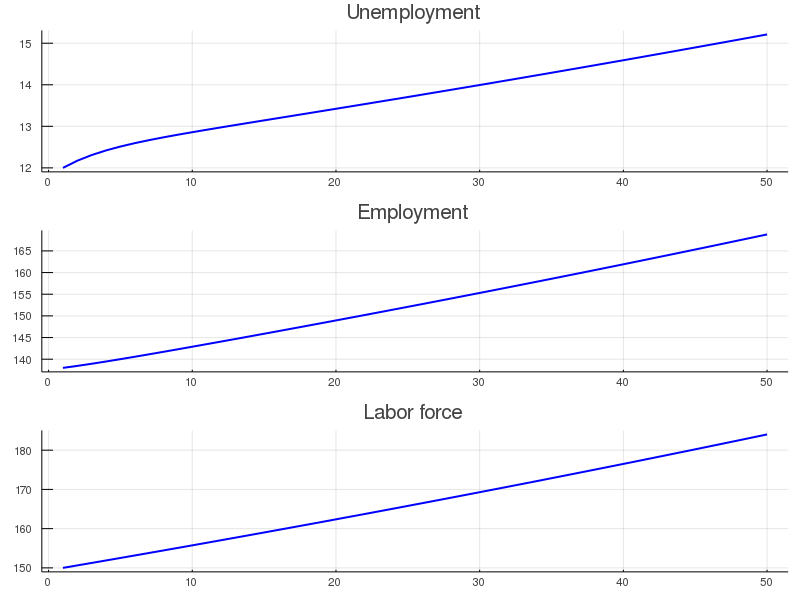

In [9]:
lm = LakeModel()
N_0 = 150      # população
e_0 = 0.92     # taxa de emprego inicial
u_0 = 1 - e_0  # taxa de desemprego inicial
T = 50         # alcance da simulação

U_0 = u_0 * N_0
E_0 = e_0 * N_0
X_0 = [U_0; E_0]

X_path = simulate_stock_path(lm, X_0, T)

x1 = X_path[1, :]
x2 = X_path[2, :]
x3 = dropdims(sum(X_path, dims = 1), dims = 1)

plt_unemp = plot(title = "Unemployment", 1:T, x1, color = :blue, lw = 2, grid = true, label = "")
plt_emp = plot(title = "Employment", 1:T, x2, color = :blue, lw = 2, grid = true, label = "")
plt_labor = plot(title = "Labor force", 1:T, x3, color = :blue, lw = 2, grid = true, label = "")

plot(plt_unemp, plt_emp, plt_labor, layout = (3, 1), size = (800, 600))

Os agregados $ E_t $ e $ U_t $ não convergem porque sua soma $ E_t + U_t $ cresce à taxa $ g $.

Por outro lado, o vetor de taxas de emprego e desemprego $ x_t $ pode estar em estado estacionário $ \bar x $ se existe um $ \bar x $ tal que

- $ \bar x = \hat A \bar x $
- os componentes satisfazem $ \bar e + \bar u = 1 $


Essa equação nos diz que um nível de estado estacionário $ \bar x $ é um vetor próprio de $ \hat A $ associado a um valor próprio unitário.

Também temos $ x_t \to \bar x $ como $ t \to \infty $, desde que o valor próprio restante de $ \hat A $ tenha um módulo menor que 1.

Este é o caso dos nossos parâmetros padrão:

In [10]:
lm = LakeModel()
A, Â = transition_matrices(lm)
e, f = eigvals(Â)
abs(e), abs(f)

(0.6953067378358462, 1.0)

Vejamos a convergência da taxa de desemprego e emprego para os níveis de estado estacionário (linha vermelha pontilhada):

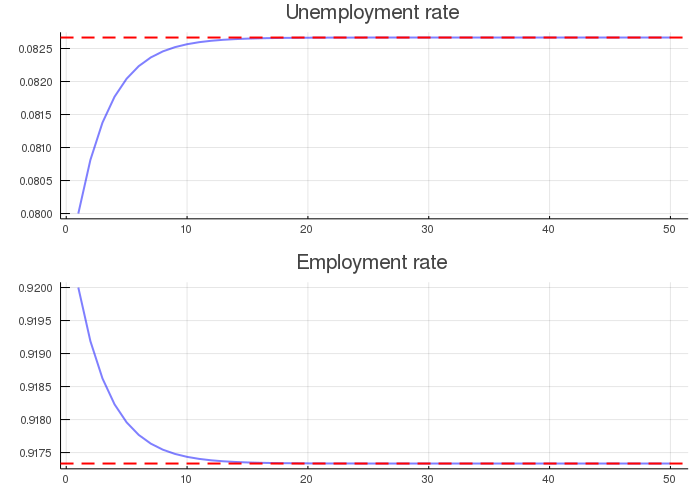

In [11]:
lm = LakeModel()
e_0 = 0.92     # taxa de emprego inicial
u_0 = 1 - e_0  # taxa de desemprego inicial
T = 50         # alcance da simulação

xbar = rate_steady_state(lm)
x_0 = [u_0; e_0]
x_path = simulate_rate_path(lm, x_0, T)

plt_unemp = plot(title ="Unemployment rate", 1:T, x_path[1, :],color = :blue, lw = 2,
                 alpha = 0.5, grid = true, label = "")
plot!(plt_unemp, [xbar[1]], color=:red, linetype = :hline, linestyle = :dash, lw = 2, label = "")
plt_emp = plot(title = "Employment rate", 1:T, x_path[2, :],color = :blue, lw = 2, alpha = 0.5,
               grid = true, label = "")
plot!(plt_emp, [xbar[2]], color=:red, linetype = :hline, linestyle = :dash, lw = 2, label = "")
plot(plt_unemp, plt_emp, layout = (2, 1), size=(700,500))

## Dinâmica de um Trabalhador Individual

A dinâmica de emprego de um trabalhador individual é regida por um [processo Markov de estado finito](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html).

O trabalhador pode estar em um dos dois estados:

- $ s_t = 0 $ significa desempregado
- $ s_t = 1 $ significa empregado


Vamos começar com a suposição de que $ b = d = 0 $.

A matriz de transição associada é então:

$$
P = \left(
        \begin{matrix}
            1 - \lambda & \lambda \\
            \alpha & 1 - \alpha
        \end{matrix}
    \right)
$$

Denuncie $ \psi_t $ a [distribuição marginal](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html#mc-md) sobre os estados de emprego / desemprego para o trabalhador no momento $ t $.

Como sempre, consideramos um vetor de linha.

Sabemos [de uma discussão anterior](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html#mc-md) que $ \psi_t $ segue a lei do movimento

$$
\psi_{t+1} = \psi_t P
$$

Também sabemos da [aula sobre cadeias finitas de Markov](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html)
que, se $ \alpha \in (0, 1) $ e $ \lambda \in (0, 1) $, então
$ P $ tem uma distribuição estacionária exclusiva, indicada aqui por $ \psi ^ * $.

A distribuição estacionária exclusiva satisfaz

$$
\psi^*[0] = \frac{\alpha}{\alpha + \lambda}
$$

Não é de surpreender que a massa de probabilidade no estado de desemprego aumente com
a taxa de demissão e caia com a taxa de procura de emprego.

### Ergodicidade

Vamos analisar uma vida típica de períodos de emprego e desemprego.

Queremos calcular a quantidade média de tempo que um trabalhador de vida infinita gastaria empregado e desempregado.

Seja

$$
\bar s_{u,T} := \frac1{T} \sum_{t=1}^T \mathbb 1\{s_t = 0\}
$$

e

$$
\bar s_{e,T} := \frac1{T} \sum_{t=1}^T \mathbb 1\{s_t = 1\}
$$

(como sempre, $ \mathbb 1\{Q\} = 1 $ se a afirmação $ Q $ for verdadeira e 0 de outra forma)

Essa é a fração do tempo que um trabalhador passa desempregado e empregado, respectivamente, até o período $ T $.

Se $ \alpha \in (0, 1) $ e $ \lambda \in (0, 1) $, $ P $ é [ergódico](https://julia.quantecon.org/../tools_and_techniques/finite_markov.html#ergodicidade) e, portanto, temos

$$
\lim_{T \to \infty} \bar s_{u, T} = \psi^*[0]
\quad \text{e} \quad
\lim_{T \to \infty} \bar s_{e, T} = \psi^*[1]
$$

com probabilidade um.

A inspeção nos diz que $ P $ é exatamente a transposição de $ \hat A $ sob a suposição $ b = d = 0 $.

Assim, as porcentagens de tempo que um trabalhador com vida infinita gasta empregado e desempregado são iguais às frações de trabalhadores empregados e desempregados na distribuição no estado estacionário.

### Taxa de convergência

Quanto tempo leva para as médias das amostras de séries temporais convergirem para médias transversais?

Podemos usar [as Cadeias de Markov do QuantEcon](http://quantecon.org/quantecon-jl) para investigar isso.

Vamos traçar o caminho da média da amostra em 5.000 períodos:

In [12]:
using QuantEcon, Roots, Random

In [13]:
lm = LakeModel(d = 0, b = 0)
T = 5000                        # Alcance da simulação

@unpack α, λ = lm
P = [(1 - λ)     λ
     α      (1 - α)]

2×2 Array{Float64,2}:
 0.717  0.283
 0.013  0.987

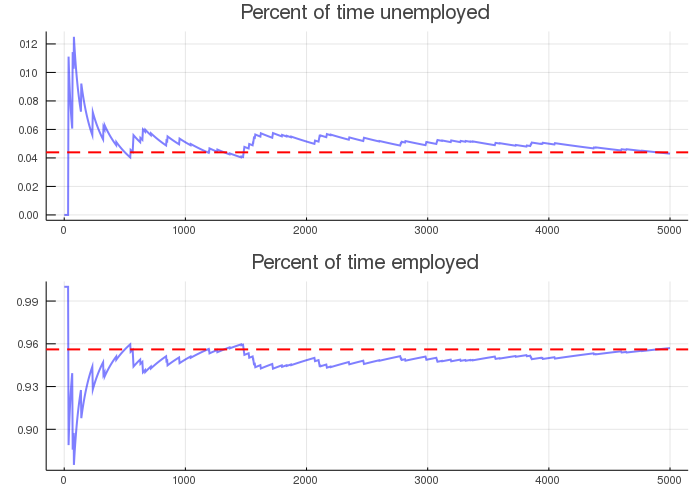

In [14]:
Random.seed!(42)
mc = MarkovChain(P, [0; 1])     # 0=desempregado, 1=empregado
xbar = rate_steady_state(lm)

s_path = simulate(mc, T; init=2)
s̄_e = cumsum(s_path) ./ (1:T)
s̄_u = 1 .- s̄_e
s_bars = [s̄_u s̄_e]

plt_unemp = plot(title = "Percent of time unemployed", 1:T, s_bars[:,1],color = :blue, lw = 2,
                 alpha = 0.5, label = "", grid = true)
plot!(plt_unemp, [xbar[1]], linetype = :hline, linestyle = :dash, color=:red, lw = 2, label = "")
plt_emp = plot(title = "Percent of time employed", 1:T, s_bars[:,2],color = :blue, lw = 2,
               alpha = 0.5, label = "", grid = true)
plot!(plt_emp, [xbar[2]], linetype = :hline, linestyle = :dash, color=:red, lw = 2, label = "")
plot(plt_unemp, plt_emp, layout = (2, 1), size=(700,500))

As probabilidades estacionárias são dadas pela linha vermelha tracejada.

Nesse caso, é preciso muito da amostra para esses dois objetos convergirem.

Isso se deve em grande parte à alta persistência na cadeia de Markov.

## Taxa de Procura de Emprego Endógena

Agora tornamos a taxa de contratação endógena.

A taxa de transição do desemprego para o emprego será determinada pelo modelo de pesquisa McCall [McC70](https://julia.quantecon.org/../zreferences.html#mccall1970).

Todos os detalhes relevantes para a discussão a seguir podem ser encontrados em [nosso tratamento](https://julia.quantecon.org/../dynamic_programming/mccall_model.html) desse modelo.

### Reserva de salários

A coisa mais importante a lembrar sobre o modelo é que decisões ótimas
são caracterizados por um salário de reserva $ \bar w $.

- Se a oferta salarial de $ w $ em mãos for maior ou igual a $ \bar w $, o trabalhador aceitará.
- Caso contrário, o trabalhador rejeita.


Como vimos em [nossa discussão sobre o modelo](https://julia.quantecon.org/../dynamic_programming/mccall_model.html), o salário de reserva depende da distribuição da oferta salarial e dos parâmetros:

- $ \alpha $, a taxa de separação;
- $ \beta $, o fator de desconto;
- $ \gamma $, a taxa de chegada da oferta, e
- $ c $, o seguro desemprego.  

### Vinculando o modelo de pesquisa McCall ao modelo de lagos

Suponha que todos os trabalhadores dentro de um modelo de lago se comportem de acordo com o modelo de pesquisa McCall.

A probabilidade exógena de deixar o emprego permanece $ \alpha $.

Mas suas regras de decisão ideais determinam a probabilidade de $ \lambda $ de deixar o desemprego.

Isto é agora:


<a id='equation-lake-lamda'></a>
$$
\lambda
= \gamma \mathbb P \{ w_t \geq \bar w\}
= \gamma \sum_{w' \geq \bar w} p(w') \tag{1}
$$

### Política Fiscal

Podemos usar a versão de pesquisa McCall do Lake Model para encontrar um nível ideal de seguro-desemprego.

Assumimos que o governo defina a remuneração do desemprego em $ c $.

O governo impõe um montante fixo $ \tau $ suficiente para financiar o pagamento total do desemprego.

Para atingir um orçamento equilibrado em estado estacionário, os impostos, a taxa de desemprego em estado estacionário $ u $ e a taxa de compensação do desemprego devem satisfazer

$$
\tau = u c
$$

O imposto fixo aplica-se a todos, inclusive aos trabalhadores desempregados.

Assim, a renda pós-imposto de um trabalhador empregado com salário $ w $ é $ w - \tau $.

A renda pós-imposto de um trabalhador desempregado é de $ c - \tau $.

Para cada especificação $ (c, \tau) $ da política do governo, podemos resolver o salário de reserva ideal do trabalhador.

Isso determina $ \lambda $ via [(1)](#equação-lago-lamda) avaliada nos salários após impostos, que por sua vez determina uma taxa de desemprego no estado estacionário $ u (c, \tau) $.

Para um determinado nível de subsídio de desemprego $ c $, podemos resolver um imposto que equilibra o orçamento no estado estacionário:

$$
\tau = u(c, \tau) c
$$

Para avaliar pares alternativos de remuneração de impostos e desemprego do governo, exigimos um critério de bem-estar.

Usamos um critério de bem-estar em estado estacionário:

$$
W := e \,  {\mathbb E} [V \, | \,  \text{employed}] + u \,  U
$$

onde a notação $ V $ e $ U $ é como definida na [palestra do modelo de pesquisa McCall](https://julia.quantecon.org/../dynamic_programming/mccall_model.html).

A distribuição da oferta salarial será uma versão discreta da distribuição lognormal $ LN (\log (20), 1) $, conforme mostrado na próxima figura:

<img src="https://julia.quantecon.org/multi_agent_models/_static/figures/lake_distribution_wages.png" style="width:100%;">

  
Tomamos o período de um mês.

Definimos $ b $ e $ d $ para coincidir com o nascimento [mensal](http://www.cdc.gov/nchs/fastats/births.htm) e as [taxas de mortalidade](http://www.cdc.gov/nchs/fastats/deaths.htm), respectivamente, na população dos EUA.

- $ b = 0,0124 $
- $ d = 0,00822 $


Após [DFH06](https://julia.quantecon.org/../zreferences.html#davis2006flow), definimos $ \alpha $, a taxa de risco de deixar o emprego, para:

- $ \alpha = 0.013 $  

### Codificando a política fiscal

Usaremos (com alguns ajustes) o código que escrevemos na [aula do modelo McCall](https://julia.quantecon.org/../dynamic_programming/mccall_model.html), incorporado abaixo por conveniência.

In [15]:
function solve_mccall_model(mcm; U_iv = 1.0, V_iv = ones(length(mcm.w)), tol = 1e-5,
                            iter = 2_000)
    @unpack α, β, σ, c, γ, w, E, u = mcm

    # objetos necessários
    u_w = u.(w, σ)
    u_c = u(c, σ)

    # o ponto fixo do operador de Bellman é x* s.a. T(x*) = x*
    function T(x)
        V = x[1:end-1]
        U = x[end]
        [u_w + β * ((1 - α) * V .+ α * U); u_c + β * (1 - γ) * U + β * γ * E * max.(U, V)]
    end

    # iteração da função de valor
    x_iv = [V_iv; U_iv] # inicial x val
    xstar = fixedpoint(T, x_iv, iterations = iter, xtol = tol).zero
    V = xstar[1:end-1]
    U = xstar[end]

    # computar a reserva de salários
    w_barindex = searchsortedfirst(V .- U, 0.0)
    if w_barindex >= length(w) # se isso for verdade, você não deverá jamais aceitar
        w̄ = Inf
    else
        w̄ = w[w_barindex] # em outros casos, retorne o número
    end

    # volte ao NamedTuple, assim podemos selecionar valores pelo nome
    return (V = V, U = U, w̄ = w̄)
end

solve_mccall_model (generic function with 1 method)

E o objeto de McCall

In [16]:
# uma função utilidade default
u(c, σ) = c > 0 ? (c^(1 - σ) - 1) / (1 - σ) : -10e-6

# construíndo o modelo
McCallModel = @with_kw (α = 0.2,
                        β = 0.98, # taxa de desconto
                        γ = 0.7,
                        c = 6.0, # seguro-desemprego
                        σ = 2.0,
                        u = u, # função utilidade
                        w = range(10, 20, length = 60), # valores dos salários
                        E = Expectation(BetaBinomial(59, 600, 400))) # distribuição sobre os valores dos salários

#10 (generic function with 2 methods)

Agora vamos calcular e traçar o bem-estar, emprego, desemprego e receita tributária como um
função da taxa de desemprego:

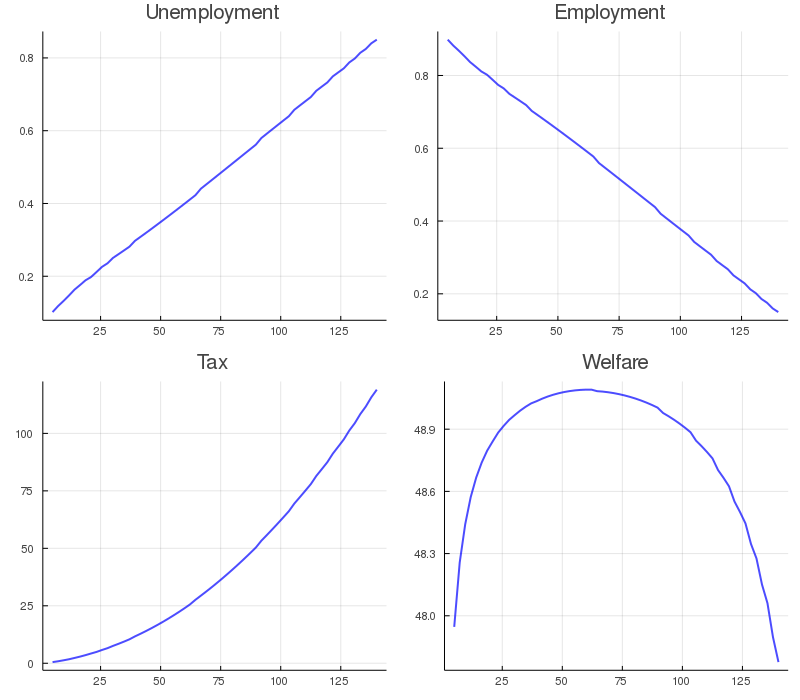

In [17]:
# algumas variáveis globais permanecerão constantes
α = 0.013
α_q = (1 - (1 - α)^3)
b_param = 0.0124
d_param = 0.00822
β = 0.98
γ = 1.0
σ = 2.0

# a distribuição de salários default: uma log-normal discreta
log_wage_mean, wage_grid_size, max_wage = 20, 200, 170
w_vec = range(1e-3, max_wage, length = wage_grid_size + 1)

logw_dist = Normal(log(log_wage_mean), 1)
cdf_logw = cdf.(logw_dist, log.(w_vec))
pdf_logw = cdf_logw[2:end] - cdf_logw[1:end-1]

p_vec = pdf_logw ./ sum(pdf_logw)
w_vec = (w_vec[1:end-1] + w_vec[2:end]) / 2

E = expectation(Categorical(p_vec)) # objeto de expectativas

function compute_optimal_quantities(c, τ)
    mcm = McCallModel(α = α_q,
                      β = β,
                      γ = γ,
                      c = c - τ, # compensação de impostos f
                      σ = σ,
                      w = w_vec .- τ, # salários pós-impostos
                      E = E) # operador de expectativas

    @unpack V, U, w̄ = solve_mccall_model(mcm)
    indicator = wage -> wage > w̄
    λ = γ * E * indicator.(w_vec .- τ)

    return w̄, λ, V, U
end

function compute_steady_state_quantities(c, τ)
    w̄, λ_param, V, U = compute_optimal_quantities(c, τ)

    # computar as taxas de emprego e desemprego no estado estacionário 
    lm = LakeModel(λ = λ_param, α = α_q, b = b_param, d = d_param)
    x = rate_steady_state(lm)
    u_rate, e_rate = x

    # computar o bem-estar no estado estacionário
    indicator(wage) = wage > w̄
    indicator(wage) = wage > w̄
    decisions = indicator.(w_vec .- τ)
    w = (E * (V .* decisions)) / (E * decisions)
    welfare = e_rate .* w + u_rate .* U

    return u_rate, e_rate, welfare
end

function find_balanced_budget_tax(c)
    function steady_state_budget(t)
        u_rate, e_rate, w = compute_steady_state_quantities(c, t)
        return t - u_rate * c
    end

    τ = find_zero(steady_state_budget, (0.0, 0.9c))
    return τ
end

# níveis de seguro-desemprego que queremos estudar
Nc = 60
c_vec = range(5, 140, length = Nc)

tax_vec = zeros(Nc)
unempl_vec = similar(tax_vec)
empl_vec = similar(tax_vec)
welfare_vec = similar(tax_vec)

for i in 1:Nc
    t = find_balanced_budget_tax(c_vec[i])
    u_rate, e_rate, welfare = compute_steady_state_quantities(c_vec[i], t)
    tax_vec[i] = t
    unempl_vec[i] = u_rate
    empl_vec[i] = e_rate
    welfare_vec[i] = welfare
end

plt_unemp = plot(title = "Unemployment", c_vec, unempl_vec, color = :blue, lw = 2, alpha=0.7,
                 label = "",grid = true)
plt_tax = plot(title = "Tax", c_vec, tax_vec, color = :blue, lw = 2, alpha=0.7, label = "",
               grid = true)
plt_emp = plot(title = "Employment", c_vec, empl_vec, color = :blue, lw = 2, alpha=0.7, label = "",
               grid = true)
plt_welf = plot(title = "Welfare", c_vec, welfare_vec, color = :blue, lw = 2, alpha=0.7, label = "",
                grid = true)

plot(plt_unemp, plt_emp, plt_tax, plt_welf, layout = (2,2), size = (800, 700))

O bem-estar aumenta primeiro e depois diminui à medida que os benefícios do desemprego aumentam.

O nível que maximiza o bem-estar do estado estacionário é de aproximadamente 62.

## Exercícios

### Exercício 1

Considere uma economia com estoque inicial de trabalhadores $ N_0 = 100 $ no
nível de emprego no estado estacionário na parametrização da linha de base

- $ \alpha = 0.013 $  
- $ \lambda = 0.283 $  
- $ b = 0.0124 $  
- $ d = 0.00822 $  


(os valores para $ \alpha $ e $ \lambda $ seguem [DFH06](https://julia.quantecon.org/../zreferences.html#davis2006flow))

Suponha que, em resposta à nova legislação, a taxa de contratação reduza para $ \lambda = 0,2 $.

Trace a dinâmica de transição dos estoques de desemprego e emprego por 50 períodos.

Trace também a dinâmica de transição para as taxas.

Quanto tempo a economia leva para convergir para seu novo estado estacionário?

Qual é o novo nível de emprego no estado estacionário?

### Exercício 2

Considere uma economia com estoque inicial de trabalhadores $ N_0 = 100 $ no
nível de emprego no estado estacionário na parametrização da linha de base.

Suponha que por 20 períodos a taxa de natalidade tenha sido temporariamente alta ($ b = 0,0025 $) e depois retornada ao seu nível original.

Trace a dinâmica de transição dos estoques de desemprego e emprego por 50 períodos.

Trace, da mesma forma, a dinâmica de transição para as taxas.

Quanto tempo a economia leva para retornar ao seu estado estacionário original?

## Soluções

### Exercício 1

Começamos construindo um objeto contendo os parâmetros padrão e atribuindo o
valores de estado estacionário para x0:

In [18]:
lm = LakeModel()
x0 = rate_steady_state(lm)
println("Initial Steady State: $x0")

Initial Steady State: [0.08266626766923285, 0.9173337323307671]


Inicializar os valores da simulação

In [19]:
N0 = 100
T = 50

50

Nova legislação muda $ \lambda $ para $ 0.2 $

In [20]:
lm = LakeModel(λ = 0.2)

(λ = 0.2, α = 0.013, b = 0.0124, d = 0.00822)

In [21]:
xbar = rate_steady_state(lm) # novo estado estacionário
X_path = simulate_stock_path(lm, x0 * N0, T)
x_path = simulate_rate_path(lm, x0, T)
println("New Steady State: $xbar")

New Steady State: [0.11309294549489421, 0.8869070545051054]


Agora, plote os estoques

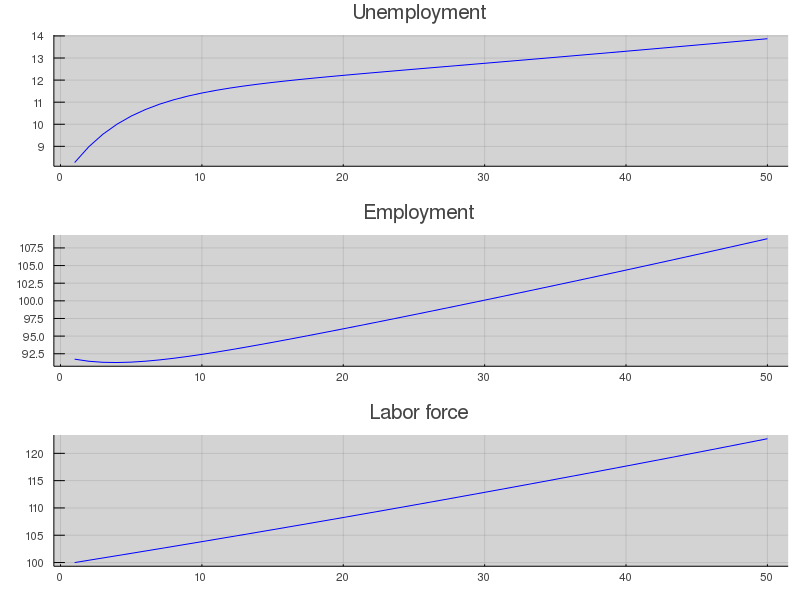

In [22]:
x1 = X_path[1, :]
x2 = X_path[2, :]
x3 = dropdims(sum(X_path, dims = 1), dims = 1)

plt_unemp = plot(title = "Unemployment", 1:T, x1, color = :blue, grid = true, label = "",
                 bg_inside = :lightgrey)
plt_emp = plot(title = "Employment", 1:T, x2, color = :blue, grid = true, label = "",
               bg_inside = :lightgrey)
plt_labor = plot(title = "Labor force", 1:T, x3, color = :blue, grid = true, label = "",
                 bg_inside = :lightgrey)

plot(plt_unemp, plt_emp, plt_labor, layout = (3, 1), size = (800, 600))

E como a taxa evolui:

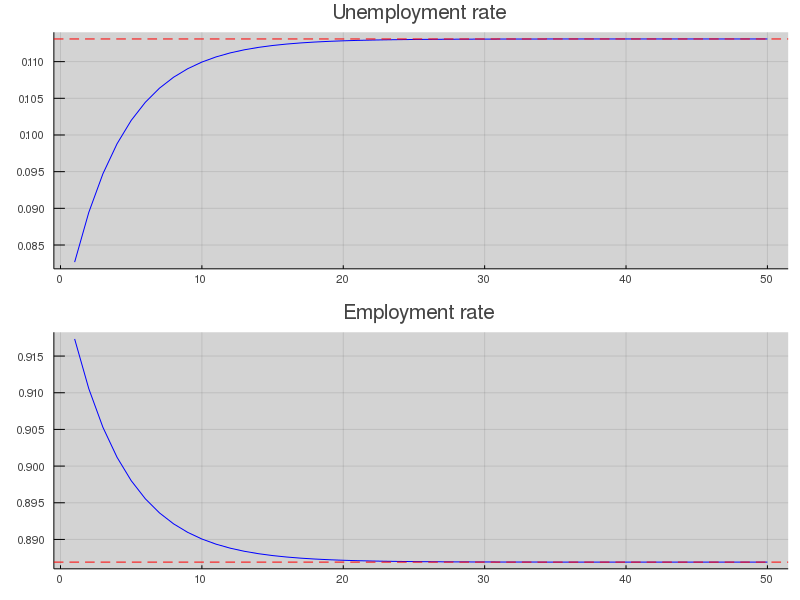

In [23]:
plt_unemp = plot(title = "Unemployment rate", 1:T, x_path[1,:], color = :blue, grid = true,
                 label = "", bg_inside = :lightgrey)
plot!(plt_unemp, [xbar[1]], linetype = :hline, linestyle = :dash, color =:red, label = "")

plt_emp = plot(title = "Employment rate", 1:T, x_path[2,:], color = :blue, grid = true,
               label = "", bg_inside = :lightgrey)
plot!(plt_emp, [xbar[2]], linetype = :hline, linestyle = :dash, color =:red, label = "")

plot(plt_unemp, plt_emp, layout = (2, 1), size = (800, 600))

Vemos que leva 20 períodos para a economia convergir para o novo
nível de estado estacionário.

### Exercício 2

Neste próximo exercício, a economia está passando por um boom de entradas para
mercado de trabalho e depois retornando aos níveis originais.

Por 20 períodos, a economia tem uma nova taxa de entrada no mercado de trabalho.

Vamos começar com a parametrização da linha de base e registrar a constante de estado:

In [24]:
lm = LakeModel()
x0 = rate_steady_state(lm)

2-element Array{Float64,1}:
 0.08266626766923285
 0.9173337323307671 

Aqui estão os outros parâmetros:

In [25]:
b̂ = 0.003
T̂ = 20

20

Vamos acrescentar $ b $ ao novo valor e simular por 20 períodos:

In [26]:
lm = LakeModel(b=b̂)
X_path1 = simulate_stock_path(lm, x0 * N0, T̂)   # estoques simulados
x_path1 = simulate_rate_path(lm, x0, T̂)         # taxas simuladas

2×20 Array{Float64,2}:
 0.0826663  0.0739981  0.0679141  …  0.0536612  0.0536401  0.0536253
 0.917334   0.926002   0.932086      0.946339   0.94636    0.946375 

Agora redefinimos $ b $ para o valor original e, usando o estado
após 20 períodos para as novas condições iniciais, simulamos para os
30 períodos adicionais.

In [27]:
lm = LakeModel(b = 0.0124)
X_path2 = simulate_stock_path(lm, X_path1[:, end-1], T-T̂+1)    # estoques simulados
x_path2 = simulate_rate_path(lm, x_path1[:, end-1], T-T̂+1)     # taxas simuladas

2×31 Array{Float64,2}:
 0.0536401  0.0624842  0.0686335  …  0.0826652  0.0826655  0.0826657
 0.94636    0.937516   0.931366      0.917335   0.917335   0.917334 

Finalmente, combinamos esses dois caminhos e plotamos:

In [28]:
x_path = hcat(x_path1, x_path2[:, 2:end])  # observação [2:] para evitar o período de duplicação em 20
X_path = hcat(X_path1, X_path2[:, 2:end])

2×50 Array{Float64,2}:
  8.26663   7.36118   6.72069   6.26524  …   8.45538   8.49076   8.52628
 91.7334   92.1168   92.238    92.1769      93.8293   94.2215   94.6153 

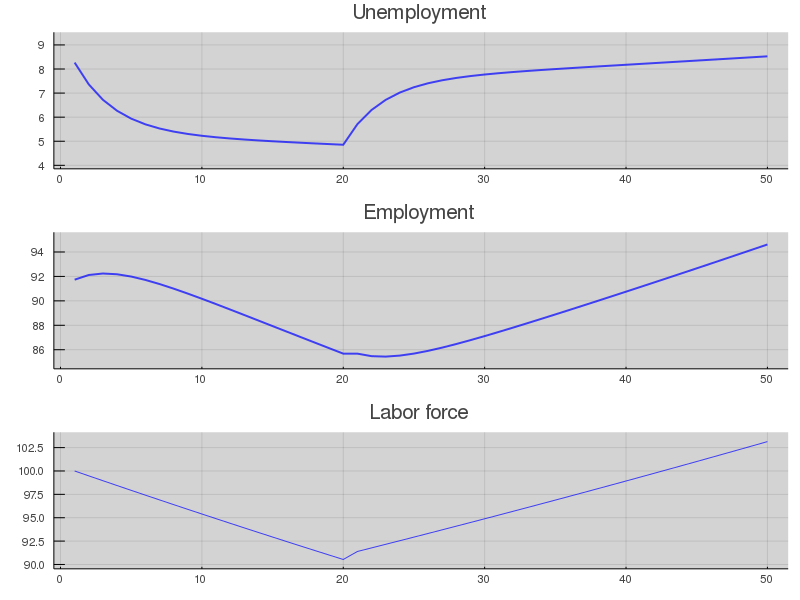

In [29]:
x1 = X_path[1,:]
x2 = X_path[2,:]
x3 = dropdims(sum(X_path, dims = 1), dims = 1)

plt_unemp = plot(title = "Unemployment", 1:T, x1, color = :blue, lw = 2, alpha = 0.7,
                 grid = true, label = "", bg_inside = :lightgrey)
plot!(plt_unemp, ylims = extrema(x1) .+ (-1, 1))

plt_emp = plot(title = "Employment", 1:T, x2, color = :blue, lw = 2, alpha = 0.7, grid = true,
               label = "", bg_inside = :lightgrey)
plot!(plt_emp, ylims = extrema(x2) .+ (-1, 1))

plt_labor = plot(title = "Labor force", 1:T, x3, color = :blue, alpha = 0.7, grid = true,
                 label = "", bg_inside = :lightgrey)
plot!(plt_labor, ylims = extrema(x3) .+ (-1, 1))
plot(plt_unemp, plt_emp, plt_labor, layout = (3, 1), size = (800, 600))

E as taxas

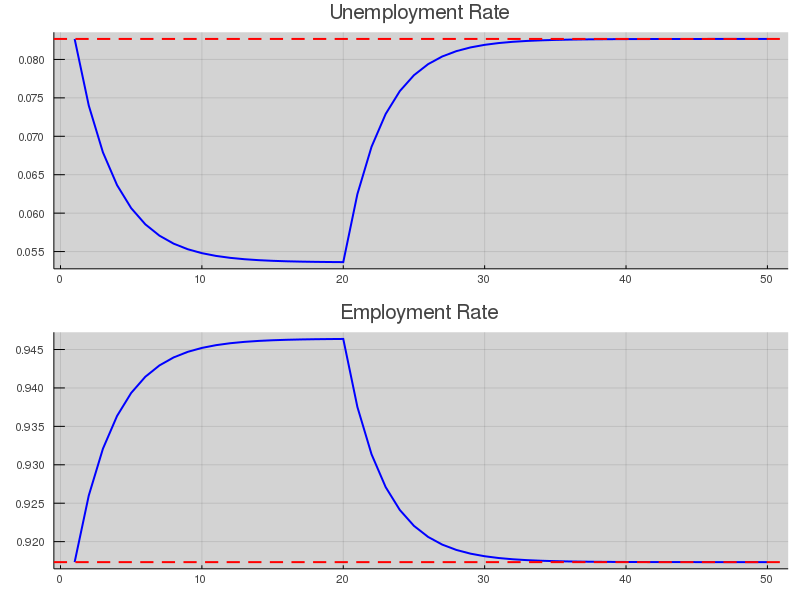

In [30]:
plt_unemp = plot(title = "Unemployment Rate", 1:T, x_path[1,:], color = :blue, grid = true,
                 label = "", bg_inside = :lightgrey, lw = 2)
plot!(plt_unemp, [x0[1]], linetype = :hline, linestyle = :dash, color =:red, label = "", lw = 2)

plt_emp = plot(title = "Employment Rate", 1:T, x_path[2,:], color = :blue, grid = true,
               label = "", bg_inside = :lightgrey, lw = 2)
plot!(plt_emp, [x0[2]], linetype = :hline, linestyle = :dash, color =:red, label = "", lw = 2)

plot(plt_unemp, plt_emp, layout = (2, 1), size = (800, 600))